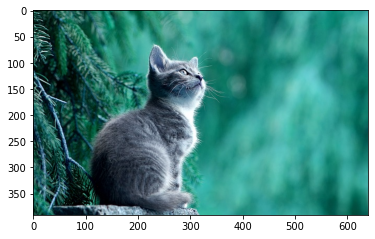

In [ ]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('cat2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread('cat2.jpg', cv2.IMREAD_GRAYSCALE)
img_un = cv2.imread('cat2.jpg', cv2.IMREAD_UNCHANGED)
plt.imshow(img)
# plt.imshow(img_gray)
plt.imshow(img_un)
plt.show()

In [ ]:
img.shape

(391, 640, 3)

# Torch

### 기본연산

In [ ]:
from re import X
import torch

# 초기화 되지 않은 텐서
x = torch.empty(4,2)
print(x)

# 무작위로 초기화된 텐서
x = torch.rand(4,2)
print(x)

# 데이터 타입이 long이고, 0으로 채워진 텐서
x = torch.zeros(4,2, dtype=torch.long)
print(x)

# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3, 2.3])
print(x)

# 2x4 크기, double타입, 1로 채워진 텐서
x = x.new_ones(2,4, dtype=torch.double)
print(x)

# x와 같은 크기, float 타입, 무작위로 채워진 텐서
x = torch.randn_like(x, dtype=torch.float)
print(x)

# 텐서의 크기 계산
print(x.size())

tensor([[1.3628e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30]])
tensor([[0.6540, 0.8723],
        [0.5109, 0.0562],
        [0.6250, 0.0482],
        [0.7939, 0.1730]])
tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])
tensor([3.0000, 2.3000])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.1307, -0.2375, -1.0532, -0.1444],
        [-0.1937, -0.4498, -0.0806,  0.7534]])
torch.Size([2, 4])


### 다차원 텐서 표현

0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [ ]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [ ]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

In [ ]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor
- 큐브와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용

In [ ]:
t3 = torch.tensor([[[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]],
                   [[1,2,3],
                    [4,5,6],
                    [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


### in-place 방식
- in-place방식으로 텐서의 값을 변경하는 연산 뒤에는_가 붙음

In [ ]:
x = torch.rand(1,5)
y = torch.rand(1,5)
print(x)
print(y)
y.add_(x) # y의 값에 x를 더한 값을 y에 넣어줘라는 뜻
print("add_ 수행 후 y : ",y)
# add(더하기) / sub(빼기) / mul(곱하기) / div(나누기)
y.sub_(x)
print("sub_ 수행 후 y : ",y)
y.mul_(x)
print("mul_ 수행 후 y : ",y)
y.div_(x)
print("div_ 수행 후 y : ",y)

tensor([[0.0521, 0.8263, 0.0486, 0.2015, 0.4885]])
tensor([[0.9945, 0.0711, 0.7609, 0.7504, 0.0963]])
add_ 수행 후 y :  tensor([[1.0466, 0.8974, 0.8095, 0.9520, 0.5848]])
sub_ 수행 후 y :  tensor([[0.9945, 0.0711, 0.7609, 0.7504, 0.0963]])
mul_ 수행 후 y :  tensor([[0.0518, 0.0587, 0.0370, 0.1512, 0.0471]])
div_ 수행 후 y :  tensor([[0.9945, 0.0711, 0.7609, 0.7504, 0.0963]])


### 메서드?

view: 텐서의 크기(size)나 모양(shape)을 변경
- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [ ]:
x = torch.randn(4,5)
print(x)
y = x.view(20)
print(y)
z = x.view(5, -1) # -1 : 행은 5개로 해주고 열은 너가 알아서 해줘
print(z)

tensor([[-0.3276,  0.2473,  0.3537,  0.7289, -1.2614],
        [-0.8523,  0.3683,  0.1662,  0.7160, -1.1307],
        [ 1.4487,  0.1386,  1.4182,  0.0706,  1.8152],
        [ 0.0173, -0.2157, -0.7592,  0.0157,  1.5249]])
tensor([-0.3276,  0.2473,  0.3537,  0.7289, -1.2614, -0.8523,  0.3683,  0.1662,
         0.7160, -1.1307,  1.4487,  0.1386,  1.4182,  0.0706,  1.8152,  0.0173,
        -0.2157, -0.7592,  0.0157,  1.5249])
tensor([[-0.3276,  0.2473,  0.3537,  0.7289],
        [-1.2614, -0.8523,  0.3683,  0.1662],
        [ 0.7160, -1.1307,  1.4487,  0.1386],
        [ 1.4182,  0.0706,  1.8152,  0.0173],
        [-0.2157, -0.7592,  0.0157,  1.5249]])


item:텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음

In [ ]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-1.0820])
-1.0819724798202515
torch.float32


스칼라값 하나만 존재해야 item()사용 가능

In [ ]:
x = torch.randn(2)
print(x)
print(x.item()) # 값이 2개니까 에러
print(x.dtype)

tensor([-0.6849, -0.0985])


ValueError: ignored

squeeze : 차원을 축소(제거)

In [ ]:
tensor = torch.rand(1,3,3)
print(tensor)
print(tensor.shape)

tensor([[[0.3027, 0.7059, 0.7327],
         [0.7403, 0.8773, 0.8749],
         [0.2292, 0.6765, 0.0844]]])
torch.Size([1, 3, 3])


In [ ]:
t = tensor.squeeze()
print(t)
print(t.shape)

tensor([[0.3027, 0.7059, 0.7327],
        [0.7403, 0.8773, 0.8749],
        [0.2292, 0.6765, 0.0844]])
torch.Size([3, 3])


unsqueeze : 차원을 증가(생성)

In [ ]:
t = torch.rand(3,3)
print(t)
print(t.shape)

tensor([[0.3083, 0.1450, 0.0185],
        [0.9170, 0.2782, 0.7235],
        [0.3738, 0.4356, 0.5166]])
torch.Size([3, 3])


In [ ]:
tensor = t.unsqueeze(dim=0)
print(tensor)
print(tensor.shape)

tensor([[[0.3083, 0.1450, 0.0185],
         [0.9170, 0.2782, 0.7235],
         [0.3738, 0.4356, 0.5166]]])
torch.Size([1, 3, 3])


In [ ]:
tensor = t.unsqueeze(dim=1)
print(tensor)
print(tensor.shape)

tensor([[[0.3083, 0.1450, 0.0185]],

        [[0.9170, 0.2782, 0.7235]],

        [[0.3738, 0.4356, 0.5166]]])
torch.Size([3, 1, 3])


In [ ]:
tensor = t.unsqueeze(dim=2)
print(tensor)
print(tensor.shape)

tensor([[[0.3083],
         [0.1450],
         [0.0185]],

        [[0.9170],
         [0.2782],
         [0.7235]],

        [[0.3738],
         [0.4356],
         [0.5166]]])
torch.Size([3, 3, 1])


stack : 텐서간 결합

In [ ]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z)

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat : 텐서를 결합하는 메소드(concatenate)
- 넘파이의 stack과 유사하지만, 쌓을 dim이 존재해야함
- 해당 차원을 늘려준 후 결합

In [ ]:
a = torch.randn(1,3,3)
print("a:",a)
b = torch.randn(1,3,3)
print("b:",b)
c = torch.cat((a,b), dim=0)
print("c:",c)
print("c:",c.size())

a: tensor([[[-0.8595,  0.1723,  0.0304],
         [-0.9337, -0.8259,  0.1590],
         [ 0.8235, -0.8369, -1.0936]]])
b: tensor([[[-0.1079, -0.9501,  0.0279],
         [-1.2767, -2.0882, -2.1889],
         [-0.3627, -1.0343, -0.8614]]])
c: tensor([[[-0.8595,  0.1723,  0.0304],
         [-0.9337, -0.8259,  0.1590],
         [ 0.8235, -0.8369, -1.0936]],

        [[-0.1079, -0.9501,  0.0279],
         [-1.2767, -2.0882, -2.1889],
         [-0.3627, -1.0343, -0.8614]]])
c: torch.Size([2, 3, 3])


In [ ]:
c = torch.cat((a,b), dim=1)
print("c:",c)
print("c:",c.size())

c: tensor([[[-0.8595,  0.1723,  0.0304],
         [-0.9337, -0.8259,  0.1590],
         [ 0.8235, -0.8369, -1.0936],
         [-0.1079, -0.9501,  0.0279],
         [-1.2767, -2.0882, -2.1889],
         [-0.3627, -1.0343, -0.8614]]])
c: torch.Size([1, 6, 3])


In [ ]:
c = torch.cat((a,b), dim=2)
print("c:",c)
print("c:",c.size())

c: tensor([[[-0.8595,  0.1723,  0.0304, -0.1079, -0.9501,  0.0279],
         [-0.9337, -0.8259,  0.1590, -1.2767, -2.0882, -2.1889],
         [ 0.8235, -0.8369, -1.0936, -0.3627, -1.0343, -0.8614]]])
c: torch.Size([1, 3, 6])


chunk : 텐서를 여러 ≈개로 나눌 때 사용(몇개로 나눌 것인가?)

In [ ]:
tensor = torch.rand(3,6)
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1)
print(t1)
print(t2)
print(t3)

tensor([[0.0631, 0.7989, 0.7148, 0.4299, 0.4986, 0.0386],
        [0.3054, 0.5678, 0.5320, 0.7476, 0.9127, 0.2307],
        [0.7048, 0.1839, 0.2283, 0.0660, 0.9688, 0.4283]])
tensor([[0.0631, 0.7989],
        [0.3054, 0.5678],
        [0.7048, 0.1839]])
tensor([[0.7148, 0.4299],
        [0.5320, 0.7476],
        [0.2283, 0.0660]])
tensor([[0.4986, 0.0386],
        [0.9127, 0.2307],
        [0.9688, 0.4283]])


split : chuck와 동일한 기능이지만 조금다름 (텐서의 크기는 몇인가?)

In [ ]:
tensor = torch.rand(3,6)
t1, t2 = torch.split(tensor, 3, dim=1)

print(tensor)
print(t1)
print(t2)

tensor([[0.8789, 0.1674, 0.7468, 0.6490, 0.7329, 0.2145],
        [0.6706, 0.0243, 0.6404, 0.9445, 0.7074, 0.3023],
        [0.3391, 0.6776, 0.5504, 0.3151, 0.7583, 0.0038]])
tensor([[0.8789, 0.1674, 0.7468],
        [0.6706, 0.0243, 0.6404],
        [0.3391, 0.6776, 0.5504]])
tensor([[0.6490, 0.7329, 0.2145],
        [0.9445, 0.7074, 0.3023],
        [0.3151, 0.7583, 0.0038]])


### torch <-> numpy
- Torch Tensor(텐서)를 numpy array(배열)로 변환 가능
  - numpy()
  - from_numpy()
- Tensor가 CPU상에 있다면 numpy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함 / GPU에서는 공유 x

In [ ]:
a = torch.ones(7)
print(a)
b = a.numpy()
print(b)
a.add_(1)
print(a)
print(b)

tensor([1., 1., 1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [ ]:
import numpy as np
a = np.ones(7)
b = torch.from_numpy(a)
print(a)
print(b)
np.add(a,1,out=a)
print(a)
print(b)

[1. 1. 1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


Autograd(자동미분)
- torch.autograd 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- backprop를 위해 미분값을 자동으로 계산

> - requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추척하기 시작     
- 기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리

In [ ]:
a = torch.randn(3,3)
a = a*3
print(a)
print(a.requires_grad)  # 기본적으로 false값을 가지고 있음

tensor([[ 5.1270, -1.0533, -0.6468],
        [-2.8501, -0.9885, -1.4146],
        [ 0.2363, -3.2202,  5.7441]])
False


requires_grad_(...)는 기존 텐서의 requires_grad 값을 바꿔치기(in-place)하여 변경
grad_fn : 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop했는지)

In [ ]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a).sum() # many to one a x a 의 값을 다 더해서 b 변수에 저장  -> 그 값이 82.3354
print(b)
print(b.grad_fn)

True
tensor(82.3354, grad_fn=<SumBackward0>)


### 기울기

In [ ]:
x = torch.ones(3,3,requires_grad=True) 
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [ ]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [ ]:
z = y * y
out = z.mean()
print(z, out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


계산이 완료된 후, .backward()를 호출하면 자동으로 역전파 계산이 가능하고, .grad 속성에 누적됨

In [ ]:
print(out)
out.backward()

tensor(36., grad_fn=<MeanBackward0>)


grad : data가 거쳐온 layer에 대한 미분값 저장

In [ ]:
print(x)
print(x.grad)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [ ]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
  y = y * 2
print(y)

tensor([1423.7911, -506.9493,  890.6511], grad_fn=<MulBackward0>)


In [ ]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


### 데이터 준비
파이토치에서는 데이터 준비를 위해 torch.utils.data의 Dataset과 DataLoader 사용 가능
- Dataset에는 다양한 데이터셋이 존재(MNIST, FashionMNIST, CIFAR10,...)
  - Vision Dataset : https://pytorch.org/vision/stable/datasets.html
  - Text Dataset : https://pytorch.org/text/stable/datasets.html
  - Audio Dataset : https://pytorch.org/audio/stable/datasets.html
- DataLoader와 Dataset을 통해 batch_size, train 여부, transform 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [ ]:
from torch.utils.data import Dataset, DataLoader

토치비전(torchvision)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지
- transforms : 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- transforms에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [ ]:
import torchvision.transforms as transforms
from torchvision import datasets

DataLoaer의 인자로 들어갈 transform을 미리 정의할 수 있고, Compose를 통해 리스트 안에 순서대로 전처리 진행
ToTensor()를 하는 이유는 torchvision이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필용

In [ ]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))])
trainset = datasets.MNIST(root='/content',  # 어느 위치에 저장할지
                          # train이 true냐 false냐에 따라 train인지 test인지 구분
                          # download : 실제 코랩에 download할 수 있도록
                          train=True, download=True, 
                          transform=mnist_transform)

testset = datasets.MNIST(root='/content',  # 어느 위치에 저장할지
                          # train이 true냐 false냐에 따라 train인지 test인지 구분
                          # download : 실제 코랩에 download할 수 있도록
                          train=False, download=True, 
                          transform=mnist_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만큼 데이터를 가져옴

In [ ]:
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape
# 28 x 28 짜리의 흑백사진 8장

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [ ]:
torch_image = torch.squeeze(images[0]) # 0번째 사진 1장을 가져옴
print(torch_image.size())

torch.Size([28, 28])
torch.Size([28, 28])


<function matplotlib.pyplot.show(*args, **kw)>

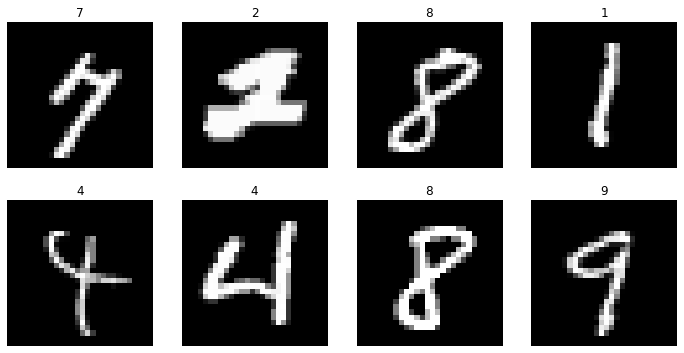

In [ ]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(12,6))
cols, rows = 4,2
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(trainset), size=(1,)).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap=('gray'))
plt.show

### 신경망 구성
- 레이어(layer) : 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module) : 한 개 이상의 계층이 모여서 구성
- 모델(model) : 한 개 이상의 모듈이 모여서 구성

torch.nn 패키지
- 주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용  (weight 값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html

In [ ]:
import torch.nn as nn

nn.Linear 계층 예제

In [ ]:
input = torch.randn(128,20)
print("input : ",input)

m = nn.Linear(20,30) # 입력이 20 출력이 30 / 20이 들어가서 30이 나옴
print("m : ",m)

output = m(input)
print("output : ",output)
print("output_size : ",output.size())

input :  tensor([[-0.0375,  1.6851,  2.6268,  ...,  0.2986, -0.3500, -1.1527],
        [ 1.6849,  0.9544, -0.3984,  ...,  0.2036,  0.3005, -0.7080],
        [-0.4072, -0.3608,  0.5980,  ..., -0.2195,  0.0577, -0.5612],
        ...,
        [ 0.1380,  0.4378,  0.7883,  ..., -0.4682,  0.3000, -0.0551],
        [-0.6546,  0.6449,  1.7856,  ...,  0.0618, -0.6031,  0.1295],
        [ 1.8643,  0.4044, -0.1328,  ..., -1.5392, -0.5507,  0.0177]])
m :  Linear(in_features=20, out_features=30, bias=True)
output :  tensor([[-0.3394,  0.0358,  0.9044,  ..., -0.3161,  0.1798, -0.2064],
        [-0.2419,  0.3183,  0.0658,  ...,  0.8707,  0.0338, -1.2231],
        [-0.4528, -1.1675, -0.3006,  ...,  0.3195, -0.1812,  0.0979],
        ...,
        [-0.4719,  0.6601,  0.0177,  ...,  0.4505,  0.6979, -0.5170],
        [ 0.2463, -0.1937,  0.6181,  ...,  0.5997, -0.7448, -0.4483],
        [-0.3437,  0.2136, -0.0125,  ...,  0.2602,  0.1557,  0.3344]],
       grad_fn=<AddmmBackward0>)
output_size :  torch.Siz

nn.Conv2d 계층 예시

In [ ]:
input = torch.randn(20,16,50,100)
print("input_size : ",input.size())

m = nn.Conv2d(16,33,3, stride=2)
m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16,33,(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
print("m : ",m)

output = m(input)
print("output_size : ",output.size())

input_size :  torch.Size([20, 16, 50, 100])
m :  Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
output_size :  torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

nn.Con2d 예제
- in_channels : channel의 갯수
- out_channels : 출력 채널의 갯수
- kernel_size : 커널(필터)사이즈

In [ ]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1) # 1개 들어가서 20개 나옴

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [ ]:
#  layer = nn.Conv2d(1,20,5,1) # 위 코드랑 같은 코드인데 인자 없이 바로 지정 가능
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu')) # 컨볼루션 층을 cpu로 전송시킴
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

weight 확인

In [ ]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

weight는 detach()를 통해 꺼내줘야 numpy() 변환이 가능

In [ ]:
weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

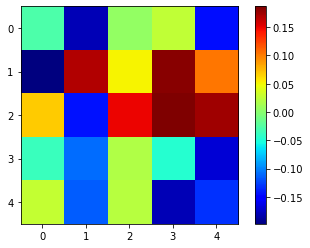

In [ ]:
plt.imshow(weight[0,0,:,:], 'jet') #colorbar = jet / gray를 넣으면 회색으로 출력됨
plt.colorbar()
plt.show()

In [ ]:
print("images_shape : ",images.shape) # 28x28 흑백 사진 8장
print("images[0]_size : ",images[0].size()) # 0번째 사진의 shape
input_image = torch.squeeze(images[0]) # 차원축소
print("input_image_size : ",input_image.size()) # 사진의 shape

images_shape :  torch.Size([8, 1, 28, 28])
images[0]_size :  torch.Size([1, 28, 28])
input_image_size :  torch.Size([28, 28])


In [ ]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size()) # 1,1,28,28 -> 28x28 흑백 사진 1장

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

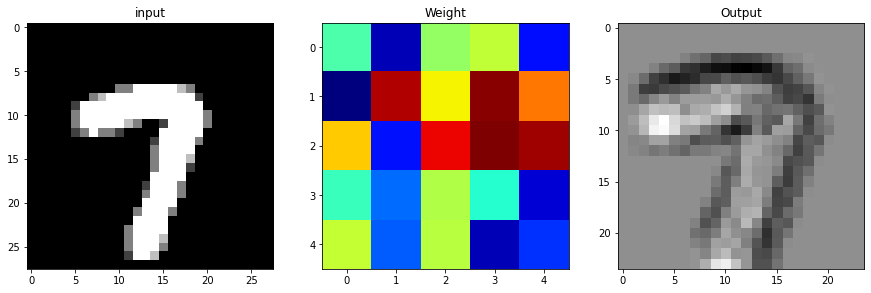

In [ ]:
# 실제 이미지 -> Convolution Layers (가중치를 적용했을 때) -> 가중치 적용한 output이미지
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title("input")
plt.imshow(input_image, 'gray')

plt.subplot(132)
plt.title("Weight")
plt.imshow(weight[0,0,:,:], "jet")

plt.subplot(133)
plt.title("Output")
plt.imshow(output_arr[0,0,:,:], "gray")
plt.show()

### 풀링 레이어(Pooling layers)
- F.max_pool2d
  - stride
  - kernel_size
- torch.nn.MaxPool2d 도 많이 사용

In [ ]:
import torch.nn.functional as f
pool = f.max_pool2d(output,2,2) # 해상도가 반으로 줄어버림 / 위에 코드를 보면 1,20,24,24
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 numpy()변환가능

In [ ]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

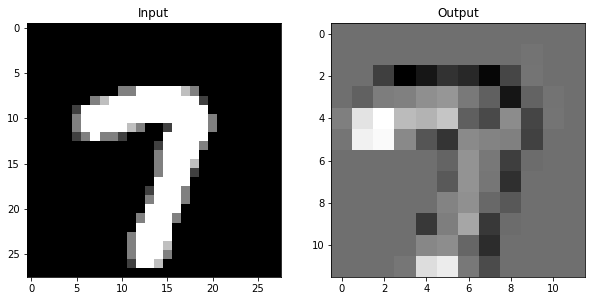

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title("Input")
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')
plt.show()

### 선형 레이어(Linear Layers)
1d만 가능하므로 .view()를 통해 1d로 펼쳐줘야함

In [ ]:
flatten = input_image.view(1, 28*28) 
flatten.shape

torch.Size([1, 784])

In [ ]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

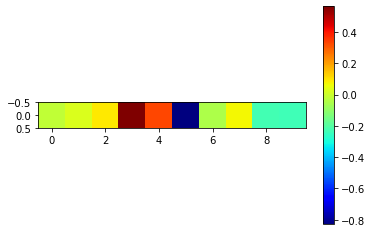

In [ ]:
plt.imshow(lin.detach().numpy(), "jet")
plt.colorbar()
plt.show()

### 비선형 활성화 (Non-linear Activations)

In [ ]:
with torch.no_grad():
  flatten = input_image.view(1,28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = f.softmax(lin, dim=1)
softmax

tensor([[0.0749, 0.0833, 0.0551, 0.1519, 0.0695, 0.0991, 0.1514, 0.0858, 0.1300,
         0.0990]])

In [ ]:
np.sum(softmax.numpy())

1.0000001

In [ ]:
inputs = torch.randn(4,3,28,28) # 28x28 컬러사진이 4개
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
layer = nn.Conv2d(3,20,5,1)
output = f.relu(layer(inputs))
print(output.shape)

torch.Size([4, 20, 24, 24])


### 모델 정의

nn.Module 상속 클래스 정의
- nn.Module을 상속받는 클래스 정의
- \__init__() : 모델에서 사용될 모듈과 활성화 함수 등을 정의
- forward() : 모델에서 실행되어야 하는 연산을 정의